In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
df = pd.read_csv('https://www.statlearning.com/s/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


this senerio y=sales the dependent variable and x1,x2,x3=Tv,radio,newspaper which act as independent variable.So let y variable will have values of sales and x vaariable has values of TV. For simplicity :)

In [95]:
x= df['TV'].values.reshape(-1,1)
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [96]:
y= df['sales'].values.reshape(-1,1)
y

array([[22.1],
       [10.4],
       [ 9.3],
       [18.5],
       [12.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [10.6],
       [ 8.6],
       [17.4],
       [ 9.2],
       [ 9.7],
       [19. ],
       [22.4],
       [12.5],
       [24.4],
       [11.3],
       [14.6],
       [18. ],
       [12.5],
       [ 5.6],
       [15.5],
       [ 9.7],
       [12. ],
       [15. ],
       [15.9],
       [18.9],
       [10.5],
       [21.4],
       [11.9],
       [ 9.6],
       [17.4],
       [ 9.5],
       [12.8],
       [25.4],
       [14.7],
       [10.1],
       [21.5],
       [16.6],
       [17.1],
       [20.7],
       [12.9],
       [ 8.5],
       [14.9],
       [10.6],
       [23.2],
       [14.8],
       [ 9.7],
       [11.4],
       [10.7],
       [22.6],
       [21.2],
       [20.2],
       [23.7],
       [ 5.5],
       [13.2],
       [23.8],
       [18.4],
       [ 8.1],
       [24.2],
       [15.7],
       [14. ],
       [18. ],
       [ 9.3],
       [ 9

In [97]:
#we will apply OLS at first
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [98]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.2, random_state =42)


In [99]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [100]:
model.coef_

array([[0.04652973]])

In [101]:
model.intercept_

array([7.11963843])

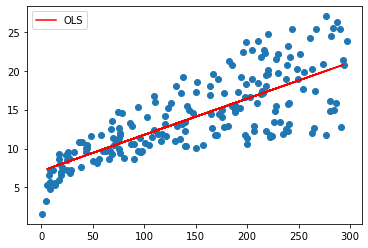

In [102]:
plt.scatter(x,y)
plt.plot(x_test,model.predict(x_test),color='red',label='OLS')
plt.legend()
plt.show()

now we will implement the gradient descent. The steps of gradient descent are:
1.randomly initalize the val b
2.for i in iteration:
       b_new = b_old - alpha.(slope at b_old)
3.perform step 2 untill b_new - b_old ~ 0

In order to calculate slope use formula:
slope at b0 = -2*(summation of i= 0 to n(yi - mxi - b0))

In [103]:
#assume m= 0.0465 and intercept at 1st step be 0(ramdom initalization)
m=0.0465
b=0
y_predicted =(m*x_test) + b

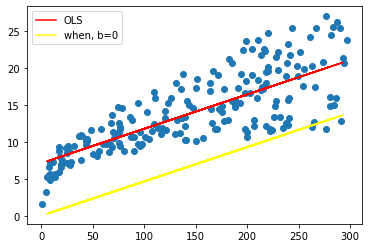

In [104]:
plt.scatter(x,y)
plt.plot(x_test,model.predict(x_test),color='red',label='OLS')
plt.plot(x_test,y_predicted,color='yellow',label='when, b=0')
plt.legend()
plt.show()

In [105]:
#iteration 1
lr = 0.01
loss_slope =-2*np.sum(y_test-m*x_test-b)
loss_slope

-594.2978

In [106]:
bnew1 = b-lr*loss_slope
bnew1

5.942978000000001

In [107]:
y_predicted1=(m*x_test)+bnew1

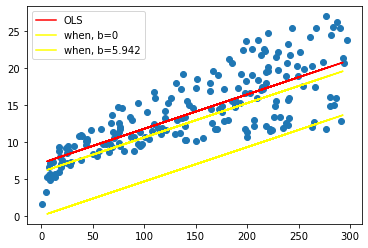

In [108]:
plt.scatter(x,y)
plt.plot(x_test,model.predict(x_test),color='red',label='OLS')
plt.plot(x_test,y_predicted,color='yellow',label='when, b=0')
plt.plot(x_test,y_predicted1,color='yellow',label='when, b=5.942')

plt.legend()
plt.show()

In [109]:
#iteration 2
loss_slope =-2*np.sum(y_test-m*x_test-bnew)
loss_slope

-118.85955999999992

In [110]:
bnew2 = bnew-lr*loss_slope
bnew2

7.1315736

In [111]:
y_predicted2=(m*x_test)+bnew2

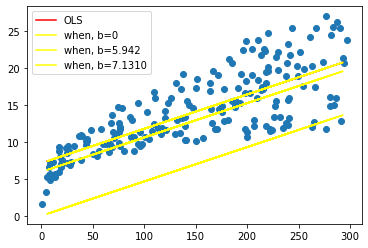

In [112]:
plt.scatter(x,y)
plt.plot(x_test,model.predict(x_test),color='red',label='OLS')
plt.plot(x_test,y_predicted,color='yellow',label='when, b=0')
plt.plot(x_test,y_predicted1,color='yellow',label='when, b=5.942')
plt.plot(x_test,y_predicted2,color='yellow',label='when, b=7.1310')
plt.legend()
plt.show()

In [113]:
#iteration 3
loss_slope =-2*np.sum(y_test-m*x_test-bnew2)
loss_slope

-23.77191199999997

In [114]:
bnew3 = bnew2-lr*loss_slope
bnew3

7.36929272

In [115]:
y_predicted3=(m*x_test)+bnew3

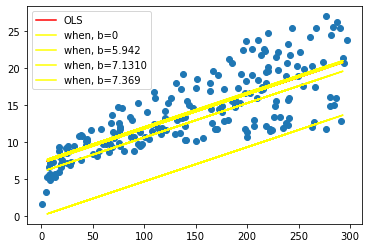

In [116]:
plt.scatter(x,y)
plt.plot(x_test,model.predict(x_test),color='red',label='OLS')
plt.plot(x_test,y_predicted,color='yellow',label='when, b=0')
plt.plot(x_test,y_predicted1,color='yellow',label='when, b=5.942')
plt.plot(x_test,y_predicted2,color='yellow',label='when, b=7.1310')
plt.plot(x_test,y_predicted3,color='yellow',label='when, b=7.369')

plt.legend()
plt.show()

At iteration 2 and 3 we can see that the the line has overlapped to OSL line at iteration 2. And the difference between bnew3 - bnew2 = 7.36-7.13 = 0.23~0 quite good :)